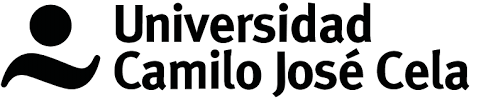

### **NOTEBOOK TFM**
 ####  **" PREDICCIÓN DE ENERGÍA PRODUCIDA POR UN AEROGENERADOR   MEDIANTE TÉCNICAS DE MACHINE LEARNING "**

#### **INTRODUCCIÓN**

Este notebook contiene el trabajo de fin de máster que he realizado para el Máster en Ciencia de Datos de la Universidad Camilo José Cela. El objetivo de este trabajo es diseñar y desarrollar un modelo de predicción de energía producida por un aerogenerador utilizando técnicas de aprendizaje automático.

El conjunto de datos que he elegido para este trabajo es el [Wind Turbine Scada Dataset](https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset/code), que contiene información de un aerogenerador como la velocidad del viento, la dirección, la potencia teórica y la potencia generada, en intervalos de 10 minutos durante el año 2018.

El propósito de este trabajo es explorar el conjunto de datos, realizar un análisis exploratorio y descriptivo, identificar las variables más relevantes para predecir la energía producida, y comparar diferentes algoritmos de regresión con el fin de acercarse lo máximo posible al resultado real. Además, se evaluará la calidad y el rendimiento de los modelos mediante distintas métricas y técnicas de validación cruzada.

Para llevar a cabo este trabajo, he utilizado el lenguaje de programación Python y diversas librerías y herramientas, tales como pandas, numpy, matplotlib, seaborn, scikit-learn, statsmodels y tensorflow. El código fuente y los resultados se presentan en este notebook, organizado en las siguientes secciones:

- Carga y limpieza de datos
- Análisis exploratorio y descriptivo
- Selección y transformación de variables
- Comparación y ajuste de modelos
- Evaluación y selección del mejor modelo
- Conclusiones y recomendaciones

### **1. ANÁLISIS EXPLORATORIO DE LOS DATOS**

In [ ]:
#Importación de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carga del dataset

data = pd.read_csv("T1.csv")

In [ ]:
# Ver los primeros registros
print(data.head())

# Ver información general del dataset
print(data.info())

# Ver estadísticas descriptivas del dataset
print(data.describe())

          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  Month  
0                     416.328908          259.994904      1  
1                     519.917511          268.641113      1  
2                     390.900016          272.564789      1  
3                     516.127569          271.258087      1  
4                     491.702972          265.674286      1  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39692 entries, 0 to 50529
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time             

In [ ]:
# Filtrado de filas con valores LV ActivePower negativos o cero

data = data[data['LV ActivePower (kW)'] > 0]

# Eliminación de valores nulos

data = data.dropna()

# Imprimimos las 5 primeras filas del dataset limpio

print(data.head())


######decir numero de observaciones que se han quitado

          Date/Time  LV ActivePower (kW)  Wind Speed (m/s)  \
0  01 01 2018 00:00           380.047791          5.311336   
1  01 01 2018 00:10           453.769196          5.672167   
2  01 01 2018 00:20           306.376587          5.216037   
3  01 01 2018 00:30           419.645905          5.659674   
4  01 01 2018 00:40           380.650696          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction (°)  
0                     416.328908          259.994904  
1                     519.917511          268.641113  
2                     390.900016          272.564789  
3                     516.127569          271.258087  
4                     491.702972          265.674286  


#### ANÁLISIS UNIVARIANTE

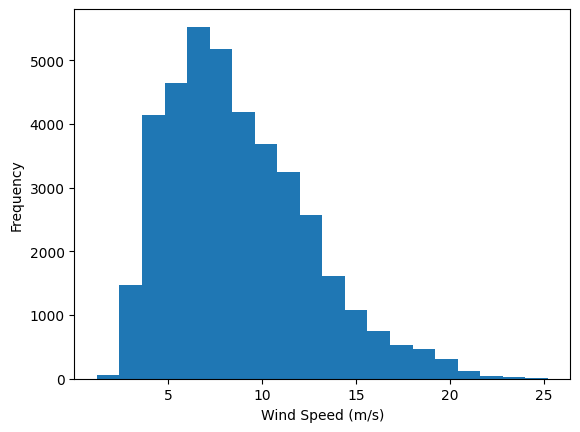

In [ ]:
# Creamos histograma para la velocidad del viento
plt.hist(data["Wind Speed (m/s)"], bins=20)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

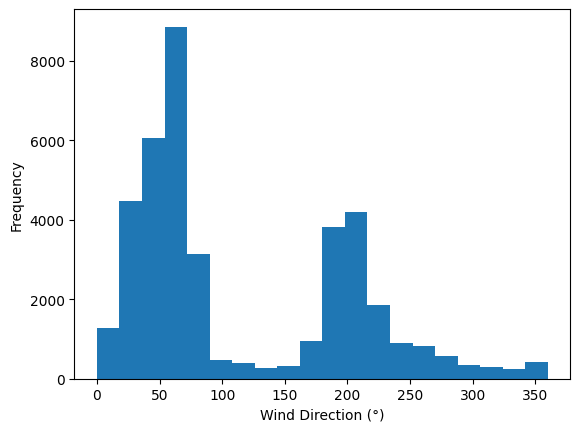

In [ ]:
# Creamos histograma para la direccción del viento
plt.hist(data["Wind Direction (°)"], bins=20)
plt.xlabel("Wind Direction (°)")
plt.ylabel("Frequency")
plt.show()

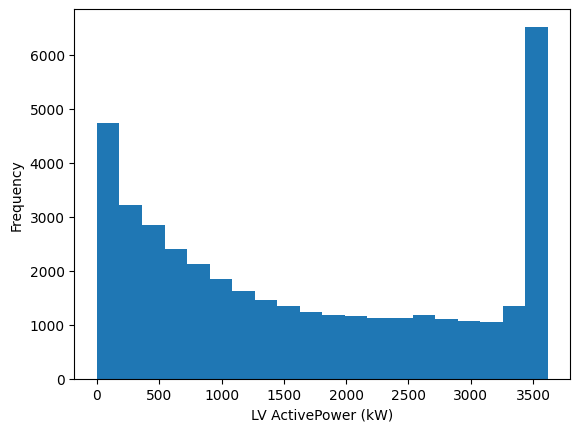

In [ ]:
# Creamos histograma para la potencia activa
plt.hist(data["LV ActivePower (kW)"], bins=20)
plt.xlabel("LV ActivePower (kW)")
plt.ylabel("Frequency")
plt.show()

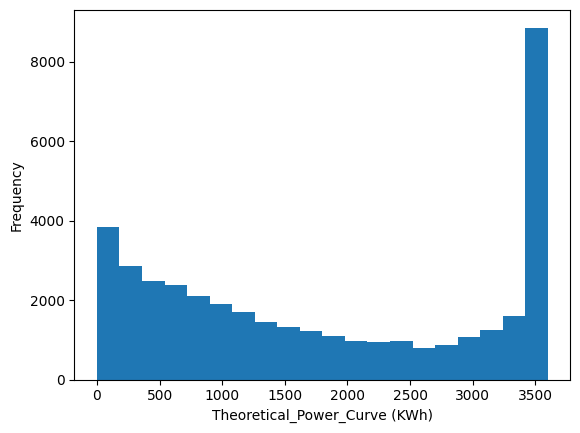

In [ ]:
# Creamos histograma para la potencia teórica
plt.hist(data["Theoretical_Power_Curve (KWh)"], bins=20)
plt.xlabel("Theoretical_Power_Curve (KWh)")
plt.ylabel("Frequency")
plt.show()

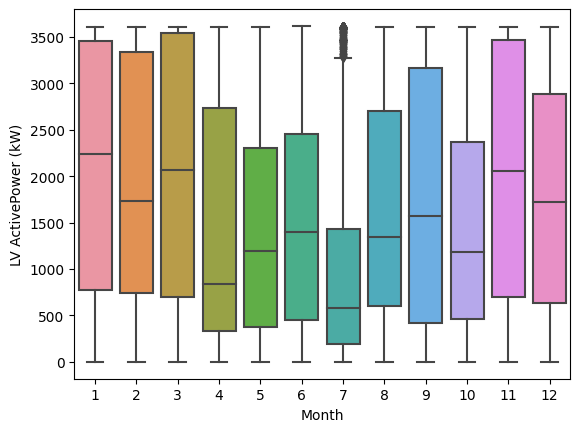

In [ ]:
# Box plot de LV ActivePower por mes
data["Month"] = pd.to_datetime(data["Date/Time"]).dt.month
sns.boxplot(x="Month", y="LV ActivePower (kW)", data=data)
plt.xlabel("Month")
plt.ylabel("LV ActivePower (kW)")
plt.show()

De acuerdo con los datos que tenemos, se puede observar que los meses de enero, febrero, marzo, septiembre, noviembre y diciembre son los que tienen los mayores rangos de potencia activa. Esto se debe probablemente a que durante esos meses hay mayores velocidades de viento en comparación con los otros meses del año. La velocidad del viento es un factor importante que afecta la producción de energía por un aerogenerador, por lo que es posible que estos meses sean los que tienen mayores niveles de producción de energía.

#### ANÁLISIS BIVARIANTE

A continuación, trazamos la relación entre las cuatro variables: Velocidad del viento, dirección del viento, potencia y curva de potencia teórica para explorar los datos.

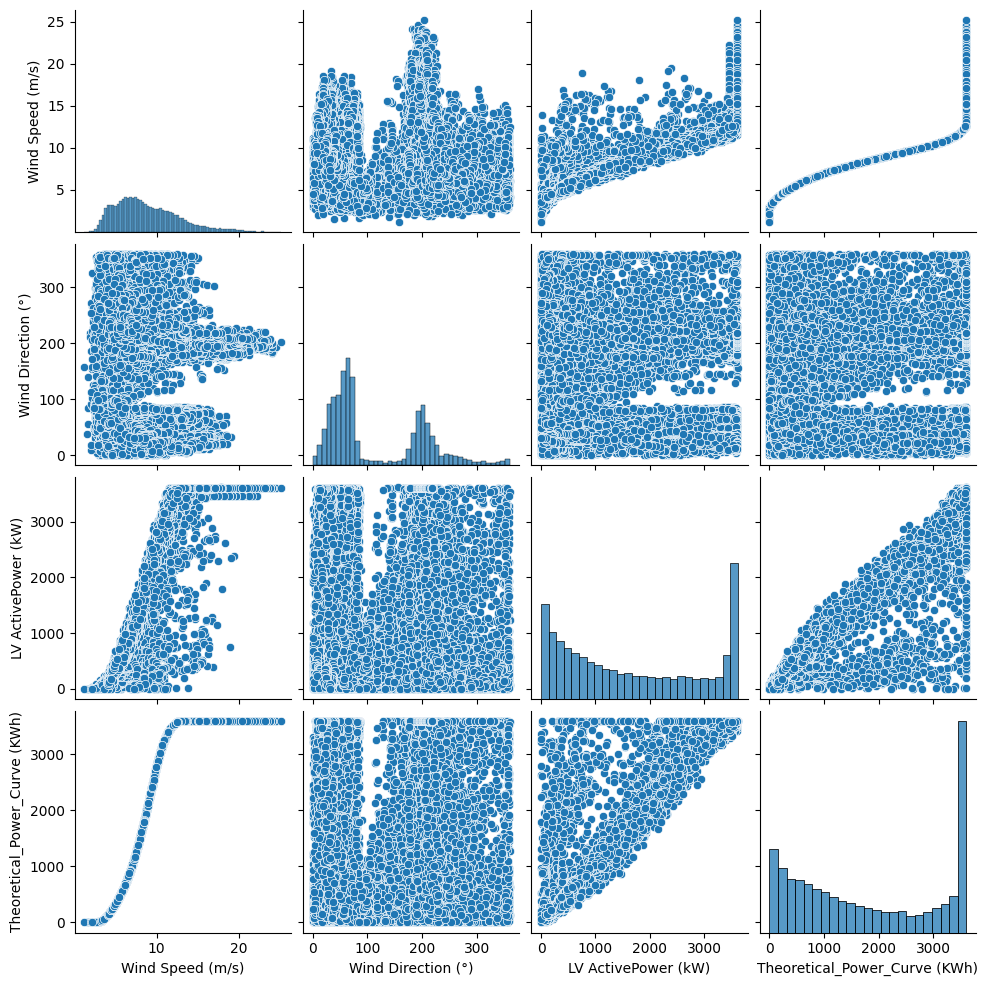

In [ ]:
# Creación de gráficos de pares de velocidad del viento, dirección del viento, potencia activa de BT y curva_de_potencia_teórica

sns.pairplot(data=data, vars=["Wind Speed (m/s)", "Wind Direction (°)", "LV ActivePower (kW)", "Theoretical_Power_Curve (KWh)"])
plt.show()

Observaciones: Se distinguen claramente donde los datos tienen diferentes correlaciones, la más evidente es en las correlaciones entre:
* "Wind Speed (m/s)" y "Theoretical_Power_Curve (KWh)"
* "Wind Speed (m/s)" y "LV ActivePower (kW)"

**Coeficiente de Pearson**

In [ ]:
from scipy.stats import pearsonr


# Leer los datos del archivo CSV y cargarlos en un DataFrame
df = pd.read_csv("T1.csv")

# Obtener los valores de las variables
wind_speed = df['Wind Speed (m/s)']
wind_direction = df['Wind Direction (°)']
power = df['LV ActivePower (kW)']

# Calcular el coeficiente de correlación de Pearson y el valor p para velocidad del viento y energía producida
correlation_speed, p_value_speed = pearsonr(wind_speed, power)

# Calcular el coeficiente de correlación de Pearson y el valor p para dirección del viento y energía producida
correlation_direction, p_value_direction = pearsonr(wind_direction, power)

# Imprimir los resultados para velocidad del viento
print("Coeficiente de correlación de Pearson (Velocidad del viento):", correlation_speed)
print("Valor p (Velocidad del viento):", p_value_speed)

# Realizar la prueba de hipótesis para velocidad del viento
alpha = 0.05

if p_value_speed < alpha:
    print("Se rechaza la hipótesis nula para velocidad del viento. Existe una correlación significativa.")
else:
    print("No se puede rechazar la hipótesis nula para velocidad del viento. No hay evidencia suficiente para afirmar una correlación significativa.")

# Imprimir los resultados para dirección del viento
print("Coeficiente de correlación de Pearson (Dirección del viento):", correlation_direction)
print("Valor p (Dirección del viento):", p_value_direction)

# Realizar la prueba de hipótesis para dirección del viento
if p_value_direction < alpha:
    print("Se rechaza la hipótesis nula para dirección del viento. Existe una correlación significativa.")
else:
    print("No se puede rechazar la hipótesis nula para dirección del viento. No hay evidencia suficiente para afirmar una correlación significativa.")


Coeficiente de correlación de Pearson (Velocidad del viento): 0.9127742911275551
Valor p (Velocidad del viento): 0.0
Se rechaza la hipótesis nula para velocidad del viento. Existe una correlación significativa.
Coeficiente de correlación de Pearson (Dirección del viento): -0.06270172624069267
Valor p (Dirección del viento): 3.3819846758929605e-45
Se rechaza la hipótesis nula para dirección del viento. Existe una correlación significativa.


### **2. ENTRENAMIENTO Y VALIDACIÓN DEL MODELO**

#### Regresión lineal

In [ ]:
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Leer los datos del archivo CSV y cargarlos en un DataFrame
df = pd.read_csv("T1.csv")

# Preprocesar los datos
df = df.drop("Theoretical_Power_Curve (KWh)", axis=1)
df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%d %m %Y %H:%M")

# Dividir los datos en conjuntos de entrenamiento y prueba
train_start_date = "01-01-2018"
train_end_date = "30-09-2018"
test_start_date = "01-10-2018"
test_end_date = "31-12-2018"

train_data = df[(df["Date/Time"] >= train_start_date) & (df["Date/Time"] <= train_end_date)]
test_data = df[(df["Date/Time"] >= test_start_date) & (df["Date/Time"] <= test_end_date)]

# Separar las variables independientes (X) y la variable dependiente (y) para el conjunto de entrenamiento y prueba
X_train = train_data.drop(["Date/Time", "LV ActivePower (kW)"], axis=1)
y_train = train_data["LV ActivePower (kW)"]

X_test = test_data.drop(["Date/Time", "LV ActivePower (kW)"], axis=1)
y_test = test_data["LV ActivePower (kW)"]

# Crear y ajustar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el coeficiente de determinación (R cuadrado) para evaluar la bondad del ajuste del modelo
r2 = r2_score(y_test, y_pred)

print("Coeficiente de determinación (R cuadrado):", r2)

# Calcular el error cuadrático medio (ECM)
mse = mean_squared_error(y_test, y_pred)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Error cuadrático medio (ECM):", mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)


Coeficiente de determinación (R cuadrado): 0.8314212360951958
Error cuadrático medio (ECM): 290357.0784344975
Raíz del error cuadrático medio (RMSE): 538.8479177230785


<ipython-input-50-68e98bb2c964>:19: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data = df[(df["Date/Time"] >= train_start_date) & (df["Date/Time"] <= train_end_date)]
<ipython-input-50-68e98bb2c964>:20: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data = df[(df["Date/Time"] >= test_start_date) & (df["Date/Time"] <= test_end_date)]


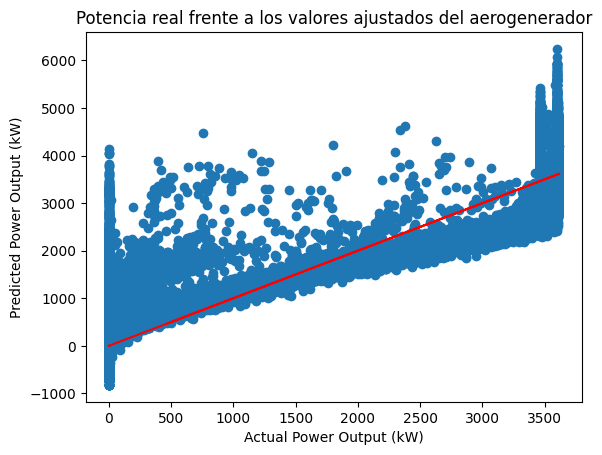

In [ ]:
import matplotlib.pyplot as plt
#Gráfico de dispersión de la salida real (y_test) frente a la salida prevista (y_pred)

plt.scatter(y_test, y_pred)

# Línea que representa las predicciones perfectas (es decir, y_test = y_pred)

plt.plot(y_test, y_test, color='red')

# Etiquetas

plt.xlabel("Actual Power Output (kW)")
plt.ylabel("Predicted Power Output (kW)")
plt.title("Potencia real frente a los valores ajustados del aerogenerador")

## Mostramos el grafico

plt.show()

Según el valor R-cuadrado de 0,83, el modelo parece ajustarse bien a los datos y puede utilizarse para predecir la generación de energía del aerogenerador en función de su velocidad y dirección del viento y de la curva de potencia teórica.

Ahora vamos a utilizar la técnica de validación cruzada implementando K-Fold

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Carga de datos
df = pd.read_csv("T1.csv")

# Seleccionar características (features) y variable a predecir (target)
X = df[['Wind Speed (m/s)', 'Wind Direction (°)']]
y = df['LV ActivePower (kW)']

# Creación del modelo de regresión lineal
model = LinearRegression()

# Creación de los k-fold
kf = KFold(n_splits=5)

# Variables para almacenar los resultados
r2_scores = []
mse_scores = []

# Iteración sobre cada conjunto de entrenamiento y prueba
for train_idx, test_idx in kf.split(X):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

    # Entrenamiento del modelo
    model.fit(X_train, y_train)

    # Predicción sobre el conjunto de prueba
    y_pred = model.predict(X_test)

    # Cálculo de las métricas
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Almacenamiento de las métricas
    r2_scores.append(r2)
    mse_scores.append(mse)

# Obtener el R2 más alto
max_r2_index = np.argmax(r2_scores)
max_r2 = r2_scores[max_r2_index]

# Calcular RMSE y ECM utilizando el conjunto correspondiente al R2 más alto
rmse = np.sqrt(mse_scores[max_r2_index])
ecm = mse_scores[max_r2_index]

# Resultados finales
print("R2 scores:", r2_scores)
print("R2 general:", np.mean(r2_scores))
print("RMSE:", rmse)
print("ECM:", ecm)


R2 scores: [0.6681651835558666, 0.8777828516683586, 0.8745801569211067, 0.8559504005920535, 0.830382848784797]
R2 general: 0.8213722883044365
RMSE: 439.4236155452708
ECM: 193093.11389887796


Los resultados obtenidos muestran que el modelo de regresión lineal con validación cruzada tiene un buen desempeño en la predicción de la variable de salida 'ActivePower'. El coeficiente de determinación (R2) varía de 0.668 a 0.8777, con un R2 general de 0.8213, lo cual indica que el modelo es capaz de explicar en gran medida la variabilidad de la variable de salida en el conjunto de datos.

El valor de RMSE es levemente más bajo que en regresion lineal sin validación cruazada, lo que sugiere que el modelo todavía tiene una cantidad significativa de error en sus predicciones. Esto puede deberse a la presencia de valores atípicos o a la falta de algunas características importantes en los datos de entrada.

Graficamos los resultados obtenidos:

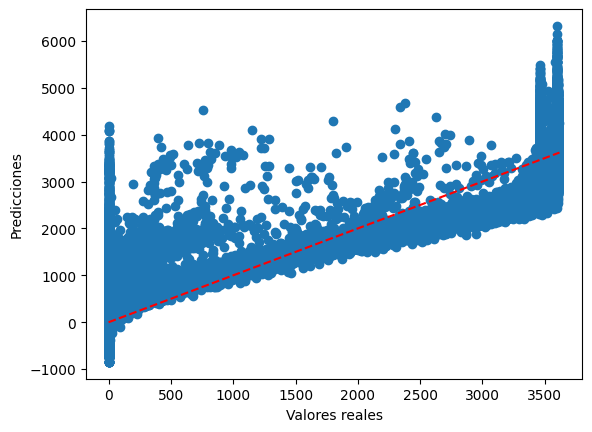

In [ ]:
import matplotlib.pyplot as plt

# Entrenamiento del modelo con todo el dataset
model.fit(X, y)

# Predicción sobre el dataset completo
y_pred = model.predict(X)

# Gráfica de valores reales y predicciones
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.show()


Además, podemos generar una gráfica de barras para visualizar los valores de R2 obtenidos en cada iteración de la validación cruzada. Esto nos permitirá identificar si hay alguna iteración que tenga un valor de R2 muy bajo y que pudiera estar afectando el valor general. Podemos utilizar la biblioteca seaborn para generar esta gráfica.

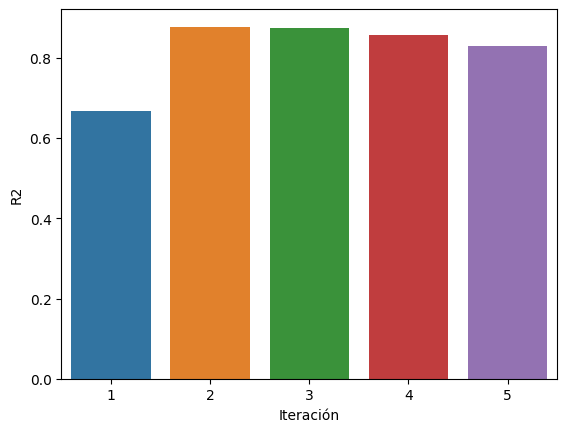

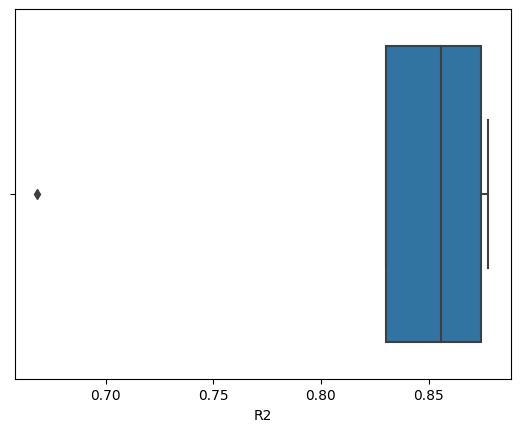

In [ ]:
import seaborn as sns

# Gráfica de barras de R2 en cada iteración
sns.barplot(x=list(range(1,6)), y=r2_scores)
plt.xlabel('Iteración')
plt.ylabel('R2')
plt.show()

# Gráfica de cajas de los valores de R2
sns.boxplot(x=r2_scores)
plt.xlabel('R2')
plt.show()

#### Series temporales

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.8 MB/s eta 0:00:00


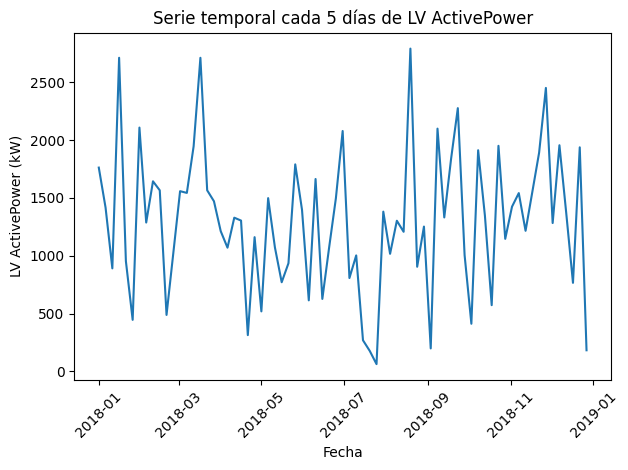

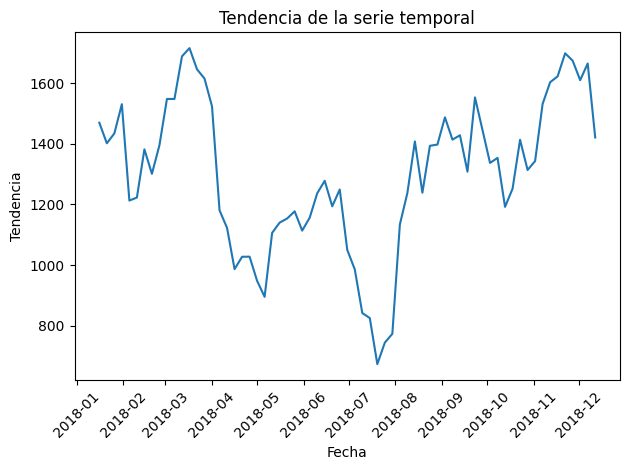

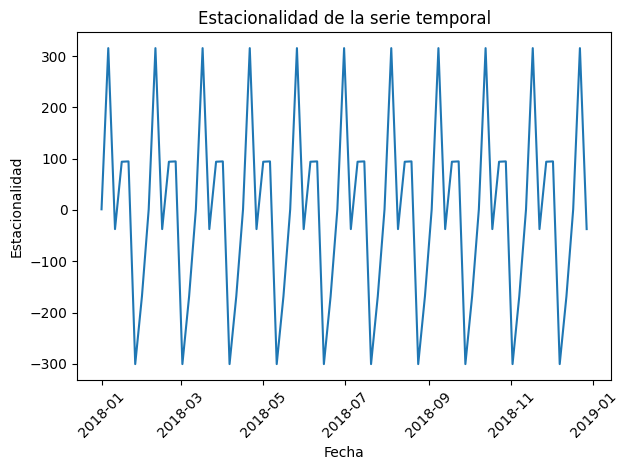

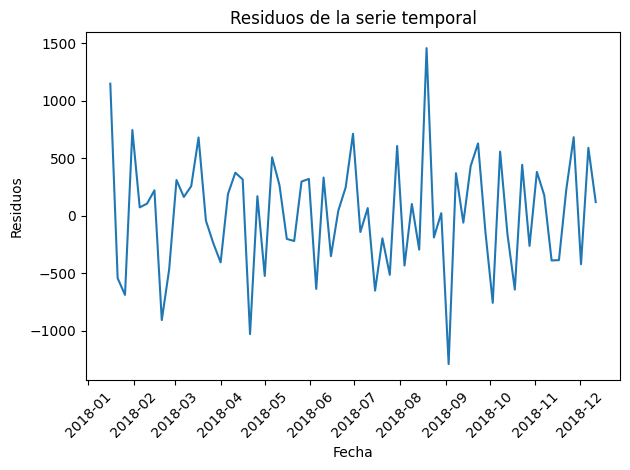

In [ ]:
#Analisis descriptivo cada 5 dias

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Carga de los datos
data = pd.read_csv('T1.csv', parse_dates=['Date/Time'], index_col='Date/Time')

# Reducimos la frecuencia a cada 5 días
daily_data = data.resample('5D').mean()

# Llenamos valores faltantes con interpolación lineal
daily_data['LV ActivePower (kW)'] = daily_data['LV ActivePower (kW)'].interpolate()

# Visualizamos los datos
plt.plot(daily_data.index, daily_data['LV ActivePower (kW)'])
plt.xlabel('Fecha')
plt.ylabel('LV ActivePower (kW)')
plt.title('Serie temporal cada 5 días de LV ActivePower')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Descomposición de la serie temporal
decomposition = seasonal_decompose(daily_data['LV ActivePower (kW)'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.plot(trend)
plt.xlabel('Fecha')
plt.ylabel('Tendencia')
plt.title('Tendencia de la serie temporal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.plot(seasonal)
plt.xlabel('Fecha')
plt.ylabel('Estacionalidad')
plt.title('Estacionalidad de la serie temporal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.plot(residual)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Residuos de la serie temporal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Leer el archivo CSV
df = pd.read_csv('T1.csv')

# Eliminar la columna "Theoretical_Power_Curve"
df.drop('Theoretical_Power_Curve (KWh)', axis=1, inplace=True)

# Convertir la columna "Date/Time" al formato datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')

# Realizar el test de Dickey-Fuller para la columna "LV ActivePower (kW)"
result = adfuller(df['LV ActivePower (kW)'])

# Obtener los valores críticos del test
print('Valores críticos:')
for key, value in result[4].items():
    print(f'{key}: {value}')

# Imprimir el resultado del test
print('Estadística de prueba:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])
print('Estacionariedad:', 'No es estacionaria' if result[1] > 0.05 else 'Es estacionaria')


Valores críticos:
1%: -3.430479515625399
5%: -2.861597243258846
10%: -2.566800468691333
Estadística de prueba: -14.008554764649645
Valor p: 3.749660006420125e-26
Valores críticos: {'1%': -3.430479515625399, '5%': -2.861597243258846, '10%': -2.566800468691333}
Estacionariedad: Es estacionaria


En este código, la función adf_test realiza el Test de Dickey-Fuller Aumentado en la serie temporal. Los resultados incluyen el estadístico de prueba, el valor p y los valores críticos. Para evaluar la estacionariedad, se puede considerar un valor p menor que un umbral predefinido (por ejemplo, 0.05) como evidencia para rechazar la hipótesis nula de no estacionariedad. Si el valor p es mayor que el umbral, no se rechaza la hipótesis nula y se considera que la serie no es estacionaria.
En este caso, rechazamos la hipótesis nula ya que el p-valor es menor que 0.05 y se considera la serie estacionaria.

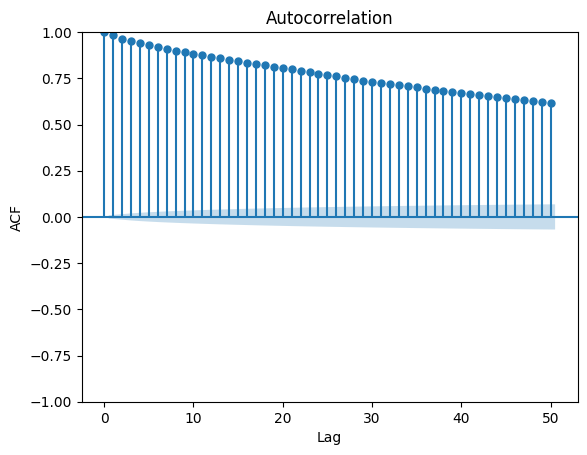

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


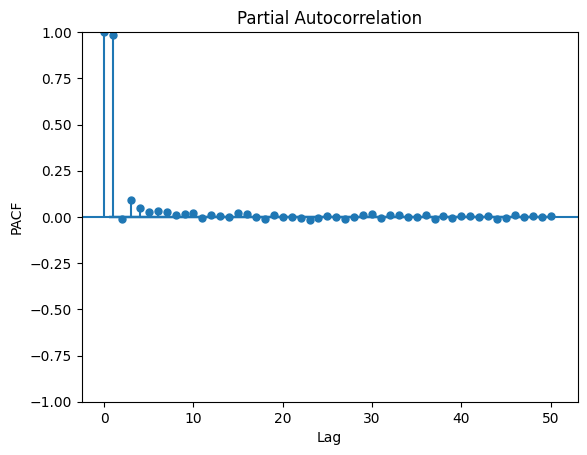

In [ ]:
#Autocorrelacion y autocorrelacion parcial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Carga de los datos desde el archivo CSV
data = pd.read_csv('T1.csv')

# Convertimos la columna Date/Time en formato de fecha
data['Date/Time'] = pd.to_datetime(data['Date/Time'], format='%d %m %Y %H:%M')

# Establecemos la columna Date/Time como índice del DataFrame
data.set_index('Date/Time', inplace=True)

# Extraemos la variable LV ActivePower para el análisis
series = data['LV ActivePower (kW)']

# Graficamos la función de autocorrelación (ACF)
plot_acf(series, lags=50)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

# Graficamos la función de autocorrelación parcial (PACF)
plot_pacf(series, lags=50)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Leer el archivo CSV
df = pd.read_csv('T1.csv')

# Eliminar la columna "Theoretical_Power_Curve"
df.drop('Theoretical_Power_Curve (KWh)', axis=1, inplace=True)

# Convertir la columna "Date/Time" al formato datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')

# Establecer la columna "Date/Time" como índice del DataFrame
df.set_index('Date/Time', inplace=True)

# Establecer la frecuencia de los datos a 10 minutos
df = df.resample('H').mean().fillna(0)

# Rellenar las fechas faltantes con valores nulos o con algún método de interpolación
df = df.interpolate(method='linear')

# Realizar la descomposición estacional
result = seasonal_decompose(df['LV ActivePower (kW)'], model='additive')

# Obtener la componente de estacionalidad
seasonality = result.seasonal

# Imprimir la componente de estacionalidad
print(seasonality)


Date/Time
2018-01-01 00:00:00     79.574701
2018-01-01 01:00:00     69.854021
2018-01-01 02:00:00     75.468451
2018-01-01 03:00:00     69.010919
2018-01-01 04:00:00     85.594372
                          ...    
2018-12-31 19:00:00    167.395072
2018-12-31 20:00:00    172.754118
2018-12-31 21:00:00    144.097349
2018-12-31 22:00:00    130.175526
2018-12-31 23:00:00    109.545478
Freq: H, Name: seasonal, Length: 8760, dtype: float64


In [ ]:
# Realizar la descomposición estacional
result = seasonal_decompose(df['LV ActivePower (kW)'], model='additive')

# Obtener la componente de estacionalidad
seasonal_component = result.seasonal

# Verificar si la serie es estacional
is_seasonal = seasonal_component.notna().all()

# Imprimir el resultado
if is_seasonal:
    print("La serie es estacional.")
else:
    print("La serie no es estacional.")


La serie es estacional.


MODELO ARIMAX

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Cargar los datos y eliminar la columna 'Theoretical_Power_Curve (KWh)'
df = pd.read_csv('T1.csv')
df.drop('Theoretical_Power_Curve (KWh)', axis=1, inplace=True)

#Convertir la columna 'Date/Time' en formato de fecha y establecerla como índice
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%d %m %Y %H:%M')
df.set_index('Date/Time', inplace=True)
df = df.resample('H').mean().fillna(0)

#Dividir los datos en conjuntos de entrenamiento y prueba
train = df.loc['2018-01-01':'2018-09-30']
test = df.loc['2018-10-01':'2018-12-31']

# Modelado ARIMA
p, d, q = 0, 0, 1  # Establecer los parámetros del modelo ARIMA
model = sm.tsa.ARIMA(train['LV ActivePower (kW)'], order=(p, d, q), exog=train[['Wind Speed (m/s)', 'Wind Direction (°)']])
model_fit = model.fit()
forecast = model_fit.predict(start=test.index[0], end=test.index[-1], exog=test[['Wind Speed (m/s)', 'Wind Direction (°)']])

# Evaluación del modelo
r2 = r2_score(test['LV ActivePower (kW)'], forecast)
mse = mean_squared_error(test['LV ActivePower (kW)'], forecast)
mae = mean_absolute_error(test['LV ActivePower (kW)'], forecast)

print("Coeficiente de determinación (R^2):", r2)
print("Error cuadrático medio (MSE):", mse)
print("Error absoluto medio (MAE):", mae)

Coeficiente de determinación (R^2): 0.8305812284747898
Error cuadrático medio (MSE): 287942.61751269613
Error absoluto medio (MAE): 419.1406785054744


Al establecer p=0, d=0 y q=1, se asume que el proceso no tiene una dependencia autoregresiva significativa, que los datos son estacionarios y que las fluctuaciones aleatorias se pueden modelar con un término de media móvil.

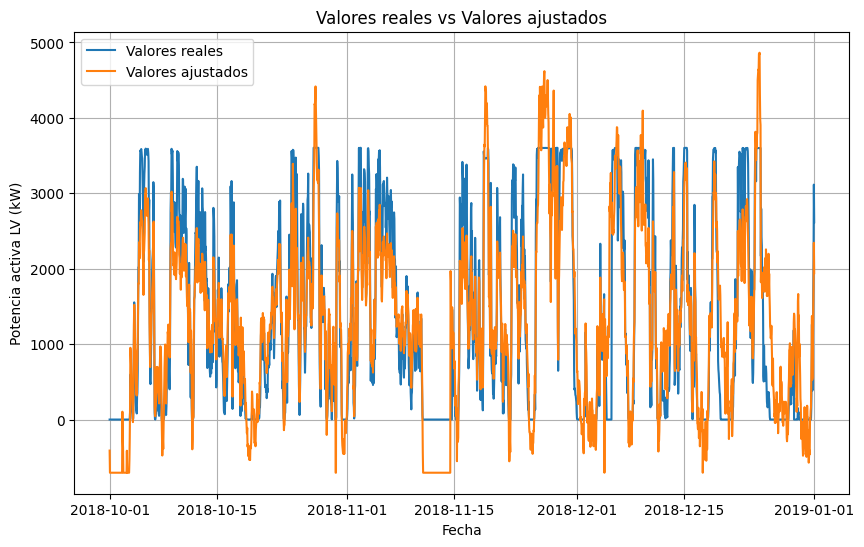

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test.index, test['LV ActivePower (kW)'], label='Valores reales')
plt.plot(test.index, forecast, label='Valores ajustados')
plt.xlabel('Fecha')
plt.ylabel('Potencia activa LV (kW)')
plt.title('Valores reales vs Valores ajustados')
plt.legend()
plt.grid(True)
plt.show()

A continuación, vamos a implementar un modelo SARIMAX. Para ello, vamos a tener en cuenta la estacionalidad de los datos y ajustar nuestro modelo en consecuencia.

In [ ]:
#Modelo SARIMAX
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score

# Cargar los datos desde el archivo CSV
dateparse = lambda x: pd.datetime.strptime(x, '%d %m %Y %H:%M')
data = pd.read_csv('T1.csv', parse_dates=['Date/Time'], index_col='Date/Time', date_parser=dateparse)

# Rellenar las fechas faltantes con valores NaN
data = data.resample('10T').asfreq()

# Rellenar los valores NaN con un valor específico
data = data.fillna(method='ffill')

# Dividir los datos en conjuntos de entrenamiento y prueba
train = data[:'2018-09-30']
test = data['2018-10-01':]

# Ajustar el modelo SARIMAX
exog_vars = ['Wind Speed (m/s)', 'Wind Direction (°)']
model = SARIMAX(train['LV ActivePower (kW)'], exog=train[exog_vars], order=(1, 0, 1), seasonal_order=(1, 0, 1, 24))
model_fit = model.fit()

# Realizar predicciones
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], exog=test[exog_vars], dynamic=False)

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(test['LV ActivePower (kW)'], predictions)

# Imprimir el R cuadrado
print(f"R cuadrado: {r2}")


<ipython-input-25-50e27c6b6940>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%d %m %Y %H:%M')
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


R cuadrado: 0.7800487027436603


ECM: 383729.05978095846
RMSE: 619.4586828683238


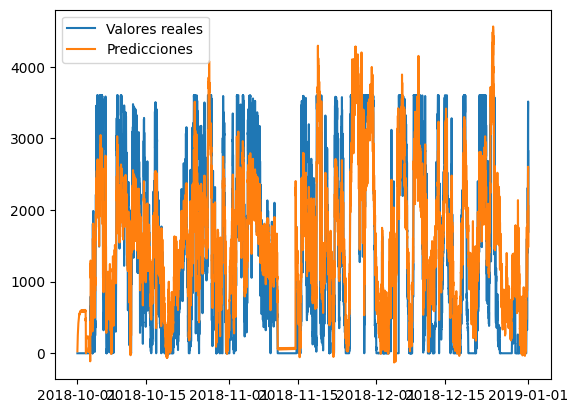

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Calcular el error cuadrático medio (ECM)
mse = mean_squared_error(test['LV ActivePower (kW)'], predictions)
print(f"ECM: {mse}")

rmse = sqrt(mse)
print(f"RMSE: {rmse}")

# Visualizar las predicciones y los valores reales
plt.plot(test.index, test['LV ActivePower (kW)'], label='Valores reales')
plt.plot(test.index, predictions, label='Predicciones')
plt.legend()
plt.show()

#### Redes neuronales

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carga de datos
df = pd.read_csv('T1.csv')
df = df.drop("Theoretical_Power_Curve (KWh)", axis=1)

# División de datos en entrenamiento y prueba
X = df.iloc[:, 2:4].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado de características
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Definición del modelo de perceptrón multicapa
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_dim=2))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Evaluación del modelo en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)
print("Coeficiente de determinación R² en el conjunto de entrenamiento:", r2_score(y_train, y_train_pred))

# Evaluación del modelo en el conjunto de prueba
y_test_pred = model.predict(X_test)
print("Coeficiente de determinación R² en el conjunto de prueba:", r2_score(y_test, y_test_pred))
print("RMSE:", mean_squared_error(y_test, y_test_pred, squared=False))


Epoch 1/100
1264/1264 [==============================] - 4s 3ms/step - loss: 518081.4688
Epoch 2/100
1264/1264 [==============================] - 6s 5ms/step - loss: 166728.7969
Epoch 3/100
1264/1264 [==============================] - 2s 2ms/step - loss: 154811.8594
Epoch 4/100
1264/1264 [==============================] - 2s 2ms/step - loss: 153951.2500
Epoch 5/100
1264/1264 [==============================] - 3s 3ms/step - loss: 152795.3750
Epoch 6/100
1264/1264 [==============================] - 4s 3ms/step - loss: 152719.0781
Epoch 7/100
1264/1264 [==============================] - 2s 2ms/step - loss: 151965.5312
Epoch 8/100
1264/1264 [==============================] - 2s 2ms/step - loss: 152168.4219
Epoch 9/100
1264/1264 [==============================] - 2s 2ms/step - loss: 151905.4531
Epoch 10/100
1264/1264 [==============================] - 3s 2ms/step - loss: 151928.0156
Epoch 11/100
1264/1264 [==============================] - 3s 2ms/step - loss: 151623.6719
Epoch 12/100
1264/1

ECM: 150669.80218584865


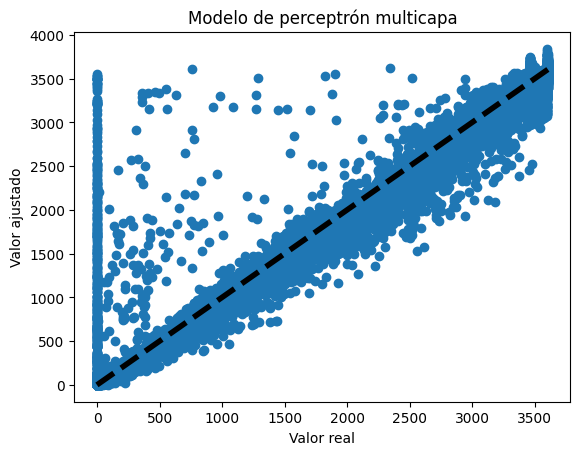

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

ecm = mean_squared_error(y_test, y_test_pred)
print("ECM:", ecm)


# Gráfica de los resultados obtenidos en el conjunto de prueba
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valor real')
plt.ylabel('Valor ajustado')
plt.title('Modelo de perceptrón multicapa')
plt.show()

Este modelo tiene tres capas ocultas con 64, 128 y 64 neuronas respectivamente. Se utiliza la función de activación 'relu' en las capas ocultas y la función de activación 'linear' en la capa de salida para obtener una salida numérica. Además, se entrena el modelo durante 100 épocas con un tamaño de lote de 32. También se han incluido las métricas RMSE y coeficiente de determinación R² en el conjunto de prueba.

NOTA: El valor de R² que se suele reportar como resultado final es el que se obtiene en el conjunto de prueba, ya que es una medida más realista del rendimiento del modelo en datos que no ha visto previamente. Sin embargo, es importante evaluar también el rendimiento en el conjunto de entrenamiento para detectar posibles problemas de sobreajuste (overfitting). En este caso, el valor de R² en el conjunto de entrenamiento es 0.9139 y en el conjunto de prueba es 0.9132, lo que indica que el modelo generaliza bien y no está sufriendo de sobreajuste.

MODELO DE RED NEURONAL RECURRENTE CON LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Carga de datos
df = pd.read_csv('T1.csv')
df = df.drop("Theoretical_Power_Curve (KWh)", axis=1)

# División de datos en entrenamiento y prueba
X = df.iloc[:, 2:4].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Escalado de características
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Definición del modelo de red neuronal recurrente con LSTM
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=64, activation='relu', input_shape=(None, 2)))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))

# Compilación del modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
model.fit(X_train.reshape(-1, 1, 2), y_train.reshape(-1, 1), batch_size=32, epochs=100)

# Evaluación del modelo en el conjunto de entrenamiento
y_train_pred = model.predict(X_train.reshape(-1, 1, 2))
print("Coeficiente de determinación R² en el conjunto de entrenamiento:", r2_score(y_train.reshape(-1, 1), y_train_pred))

# Evaluación del modelo en el conjunto de prueba
y_test_pred = model.predict(X_test.reshape(-1, 1, 2))
print("Coeficiente de determinación R² en el conjunto de prueba:", r2_score(y_test.reshape(-1, 1), y_test_pred))
print("RMSE:", mean_squared_error(y_test.reshape(-1, 1), y_test_pred, squared=False))


Epoch 1/100
1264/1264 [==============================] - 9s 4ms/step - loss: 633390.1250
Epoch 2/100
1264/1264 [==============================] - 5s 4ms/step - loss: 166678.2031
Epoch 3/100
1264/1264 [==============================] - 4s 3ms/step - loss: 155506.6250
Epoch 4/100
1264/1264 [==============================] - 5s 4ms/step - loss: 153802.0781
Epoch 5/100
1264/1264 [==============================] - 4s 3ms/step - loss: 152925.1094
Epoch 6/100
1264/1264 [==============================] - 4s 3ms/step - loss: 152665.4219
Epoch 7/100
1264/1264 [==============================] - 5s 4ms/step - loss: 152396.0000
Epoch 8/100
1264/1264 [==============================] - 4s 3ms/step - loss: 152161.8125
Epoch 9/100
1264/1264 [==============================] - 6s 4ms/step - loss: 151896.6406
Epoch 10/100
1264/1264 [==============================] - 5s 4ms/step - loss: 151807.2188
Epoch 11/100
1264/1264 [==============================] - 5s 4ms/step - loss: 151514.5156
Epoch 12/100
1264/1

ECM: 147838.46265081456


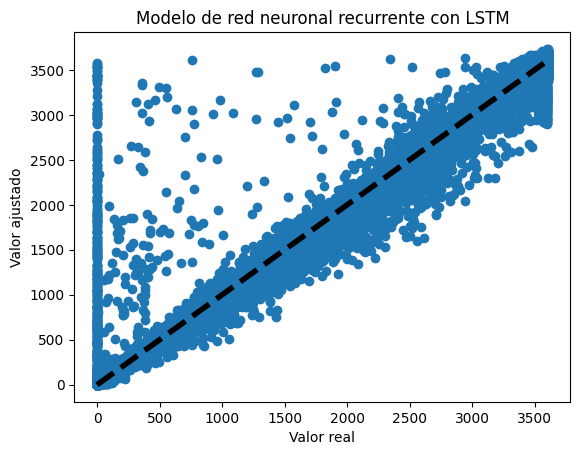

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

ecm = mean_squared_error(y_test.reshape(-1, 1), y_test_pred)
print("ECM:", ecm)

# Gráfica de los resultados obtenidos en el conjunto de prueba
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Valor real')
plt.ylabel('Valor ajustado')
plt.title('Modelo de red neuronal recurrente con LSTM')
plt.show()

### **RESULTADOS**

<ipython-input-24-12685783eca4>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(model_names, rotation=45)
<ipython-input-24-12685783eca4>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(model_names, rotation=45)


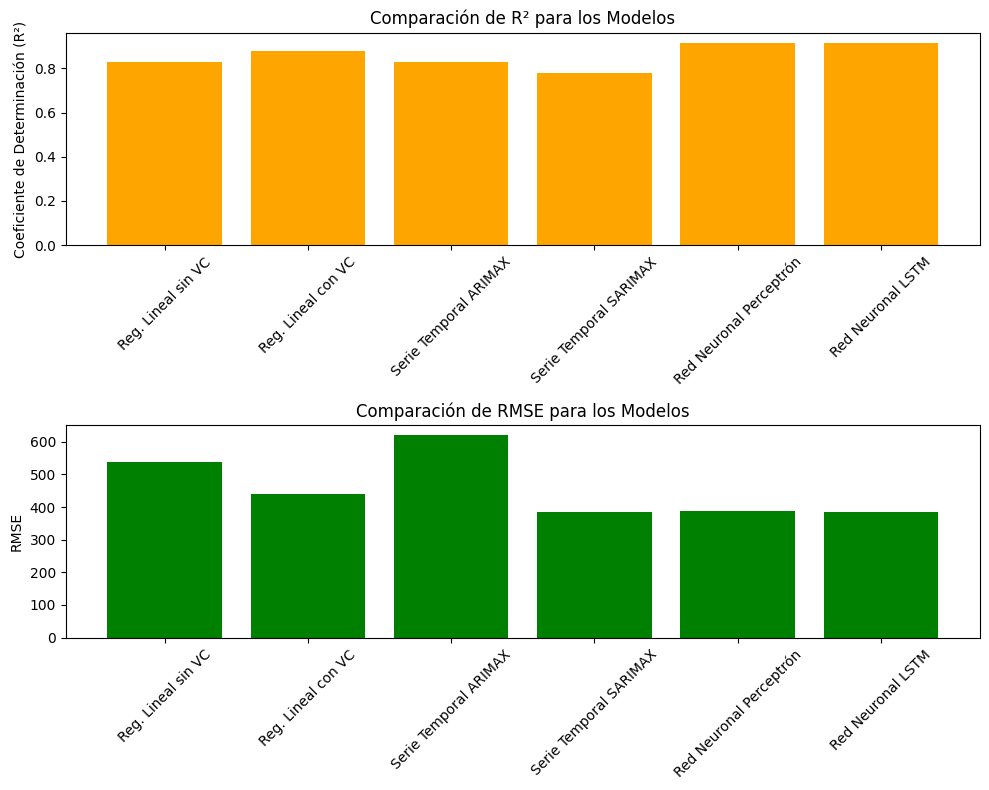

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Resultados de los modelos
r2_scores = [0.831, 0.877, 0.8305812284747898, 0.780, 0.913, 0.915]
rmse_values = [538.848, 439.423, 619.458, 384.162, 388.162, 384.498]

# Nombres de los modelos
model_names = ['Reg. Lineal sin VC', 'Reg. Lineal con VC', 'Serie Temporal ARIMAX', 'Serie Temporal SARIMAX', 'Red Neuronal Perceptrón', 'Red Neuronal LSTM']

# Configuración del gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de barras para el Coeficiente de Determinación (R²)
ax1.bar(model_names, r2_scores, color='orange')
ax1.set_ylabel('Coeficiente de Determinación (R²)')
ax1.set_title('Comparación de R² para los Modelos')
ax1.set_xticklabels(model_names, rotation=45)

# Gráfico de barras para el RMSE
ax2.bar(model_names, rmse_values, color='green')
ax2.set_ylabel('RMSE')
ax2.set_title('Comparación de RMSE para los Modelos')
ax2.set_xticklabels(model_names, rotation=45)

# Ajuste de espacio entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()
